In [41]:
import tensorflow as tf

In [2]:
tensorflow.__version__

'2.9.1'

In [3]:
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [4]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 19s 2us/step


In [5]:
len(X_train)

60000

In [6]:
len(X_test)

10000

In [7]:
X_train[0].shape

(28, 28)

In [8]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

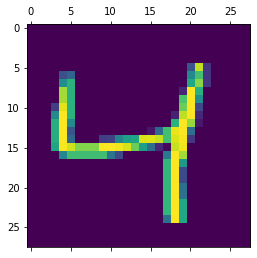

In [13]:
plt.matshow(X_train[2])

In [14]:
y_train[2]

4

In [15]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [16]:
X_train.shape

(60000, 28, 28)

In [25]:
# scalling the data
X_train = X_train/255
X_test = X_test/255

In [26]:
# (60000,28*28)
X_train_flattened = X_train.reshape(len(X_train),28*28)
print(X_train_flattened)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [27]:
X_train_flattened.shape

(60000, 784)

In [28]:
X_test_flattened = X_test.reshape(len(X_test),28*28)

In [29]:
X_test_flattened.shape

(10000, 784)

In [30]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [31]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])


model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened,y_train,epochs=5)


Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4701 - accuracy: 0.8770
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3041 - accuracy: 0.9151
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2832 - accuracy: 0.9203
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2734 - accuracy: 0.9239
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2665 - accuracy: 0.9251


In [32]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2732 - accuracy: 0.9234


[0.27316972613334656, 0.9233999848365784]

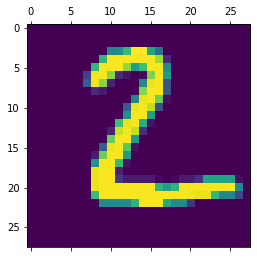

In [37]:
plt.matshow(X_test[1])

In [38]:
y_predicted = model.predict(X_test_flattened)

313/313 [==============================] - 1s 1ms/step


In [39]:
y_predicted[1]

array([5.5429184e-01, 3.7180365e-03, 9.9945915e-01, 4.5187739e-01,
       4.0870998e-10, 8.8647139e-01, 8.8493693e-01, 4.7921329e-13,
       2.0493330e-01, 2.6152713e-09], dtype=float32)

In [40]:
np.argmax(y_predicted[1])

2

In [42]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [44]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [45]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 969,    0,    1,    2,    0,    4,    2,    1,    1,    0],
       [   0, 1103,    5,    2,    0,    1,    4,    2,   18,    0],
       [   8,    7,  923,   19,    7,    3,   10,    8,   43,    4],
       [   4,    0,   19,  930,    1,   20,    2,    7,   20,    7],
       [   2,    1,    8,    1,  920,    0,    8,    3,   10,   29],
       [  12,    1,    6,   43,   11,  773,    8,    3,   30,    5],
       [  18,    3,   11,    1,    8,   14,  899,    1,    3,    0],
       [   2,    6,   26,   10,    9,    1,    0,  933,    3,   38],
       [  10,    6,    6,   28,    9,   29,    8,    6,  866,    6],
       [  11,    7,    1,   13,   33,    9,    0,   12,    5,  918]])>

Text(69.0, 0.5, 'Truth')

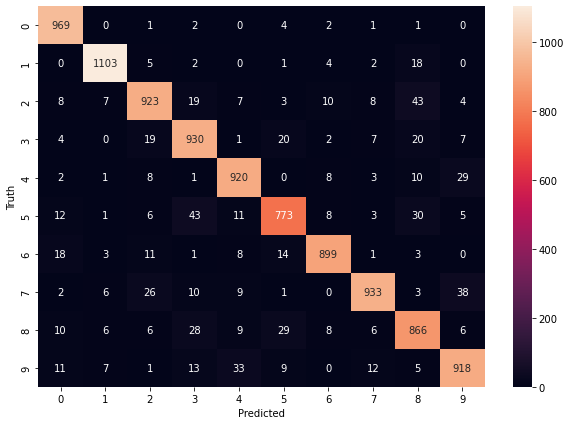

In [46]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [47]:
model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])


model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2648 - accuracy: 0.9250
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1201 - accuracy: 0.9657
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0846 - accuracy: 0.9748
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0647 - accuracy: 0.9805
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0505 - accuracy: 0.9847


In [48]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0803 - accuracy: 0.9762


[0.08028588443994522, 0.9761999845504761]

313/313 [==============================] - 0s 1ms/step


Text(69.0, 0.5, 'Truth')

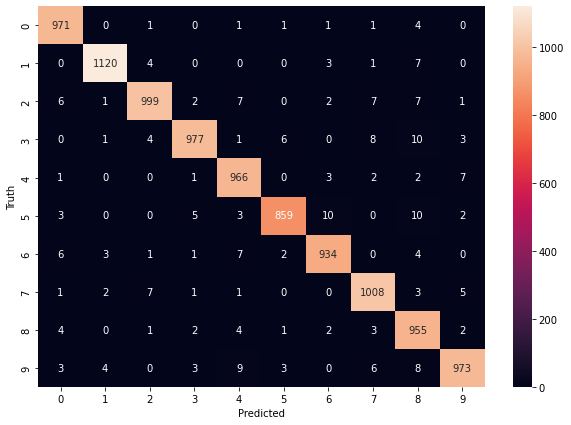

In [49]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [50]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])


model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2660 - accuracy: 0.9244
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1200 - accuracy: 0.9645
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0846 - accuracy: 0.9747
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0650 - accuracy: 0.9807
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0514 - accuracy: 0.9838
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0410 - accuracy: 0.9870
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0344 - accuracy: 0.9900
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0283 - accuracy: 0.9912
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0235 - accuracy: 0.9930
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.019

In [51]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0827 - accuracy: 0.9763


[0.08274950087070465, 0.9763000011444092]

313/313 [==============================] - 0s 1ms/step


Text(69.0, 0.5, 'Truth')

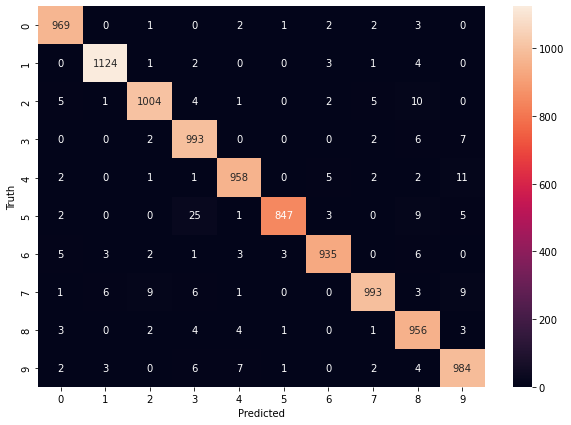

In [52]:
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")